You are a member of an elite group of data scientists, specialising in advanced facial recognition technology, this firm is dedicated to identifying and safeguarding prominent individuals from various spheres—ranging from entertainment and sports to politics and philanthropy. The team's mission is to deploy AI-driven solutions that can accurately distinguish between images of notable personalities and the general populace, enhancing the personal security of such high-profile individuals. You're to focus on Arnold Schwarzenegger, a figure whose accomplishments span from bodybuilding champion to Hollywood icon, and from philanthropist to the Governor of California.

### The Data
The data/lfw_arnie_nonarnie.csv dataset contains processed facial image data derived from the "Labeled Faces in the Wild" (LFW) dataset, focusing specifically on images of Arnold Schwarzenegger and other individuals not identified as him. This dataset has been prepared to aid in the development and evaluation of facial recognition models. There are 40 images of Arnold Schwarzenegger and 150 of other people.

#### Column Name	Description

PC1, PC2, ... PCN=	Principal components from PCA, capturing key image features. \
Label=	Binary indicator: 1 for Arnold Schwarzenegger, 0 for others. 

### GridSearchCV :
helps to find the best combination of hyperparameters for a model.

### imblearn.over_sampling.SMOTE:
Synthetic Minority Oversampling Technique \
Handles imbalanced datasets by synthetically generating samples for the minority class.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("lfw_arnie_nonarnie.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,...,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,...,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,...,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,...,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,...,0.034412,0.265141,0.226000,0.032064,-0.113654,0.059126,-0.216803,0.025849,0.020456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.929206,-3.957159,2.576241,-1.540631,1.856410,-1.614303,3.188085,-1.217261,1.151327,-2.676236,...,0.013772,-0.039762,0.086136,0.063404,-0.080463,-0.013714,-0.065795,-0.010540,0.162123,0
186,-1.024236,1.449931,2.817700,0.860038,2.189413,-0.367662,-1.271834,3.028353,0.416678,0.631283,...,0.509537,-0.233772,0.130392,0.265338,0.240753,0.050460,0.196740,0.188232,-0.021774,0
187,0.315339,-4.072507,-2.833906,4.247574,0.389125,-1.023541,-3.496387,0.396100,0.019430,0.596109,...,0.022678,-0.097045,0.087939,-0.047889,0.133939,-0.107379,0.188582,-0.024228,0.005198,0
188,-3.266702,-7.227386,-1.095678,1.225573,4.074849,0.778331,-1.672117,1.135591,2.143851,0.276779,...,-0.146328,0.259239,0.085519,0.032331,-0.029974,0.191246,-0.054959,-0.076376,-0.204795,0


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,...,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,...,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,...,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,...,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,...,0.034412,0.265141,0.226000,0.032064,-0.113654,0.059126,-0.216803,0.025849,0.020456,1


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,...,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,190.000000
mean,3.626611e-07,-1.567368e-07,8.608947e-08,2.308705e-07,-6.139842e-08,7.773526e-08,-1.379737e-07,-1.238158e-07,-3.516316e-08,-1.758368e-07,...,-1.876316e-09,-1.176173e-07,1.957384e-08,6.469947e-08,-3.847421e-08,1.217516e-07,1.200974e-07,9.632100e-08,-3.580158e-08,0.210526
std,4.174661e+00,2.793032e+00,2.280145e+00,2.186781e+00,1.623655e+00,1.464663e+00,1.331932e+00,1.209180e+00,1.174319e+00,1.064269e+00,...,1.634122e-01,1.628324e-01,1.600176e-01,1.590328e-01,1.581483e-01,1.568798e-01,1.540334e-01,1.521266e-01,1.499630e-01,0.408760
min,-1.035394e+01,-7.227386e+00,-5.509459e+00,-5.586218e+00,-3.893015e+00,-3.028338e+00,-3.496387e+00,-2.958540e+00,-2.580383e+00,-2.703504e+00,...,-4.580728e-01,-4.789119e-01,-4.384758e-01,-4.589770e-01,-4.508098e-01,-3.762155e-01,-4.039431e-01,-3.864005e-01,-4.224755e-01,0.000000
25%,-3.168281e+00,-1.793691e+00,-1.425456e+00,-1.251774e+00,-1.207175e+00,-1.043150e+00,-9.509051e-01,-8.916693e-01,-8.613460e-01,-6.858782e-01,...,-9.575428e-02,-8.679089e-02,-1.079554e-01,-9.202852e-02,-1.124082e-01,-9.764939e-02,-9.217674e-02,-9.194617e-02,-1.047070e-01,0.000000
50%,-1.566209e-01,7.839222e-02,-1.296116e-01,-3.981813e-02,-2.011608e-02,1.120602e-02,2.730676e-02,-8.985132e-02,-1.190949e-01,-9.108640e-02,...,4.545419e-03,-1.101326e-02,7.399638e-03,-6.269432e-03,1.132633e-02,-4.148387e-03,4.465733e-03,1.717945e-03,3.172091e-03,0.000000
75%,2.568815e+00,1.664303e+00,1.483138e+00,1.419419e+00,1.100513e+00,9.168475e-01,7.944625e-01,8.323183e-01,6.636175e-01,5.906489e-01,...,7.838994e-02,9.336030e-02,1.208439e-01,7.647957e-02,1.068393e-01,1.028569e-01,9.239290e-02,1.060982e-01,8.753541e-02,0.000000
max,1.182195e+01,7.844313e+00,6.406050e+00,6.569901e+00,5.274433e+00,4.150571e+00,3.730658e+00,3.028353e+00,3.672067e+00,4.118035e+00,...,6.343045e-01,4.915149e-01,4.649277e-01,5.217418e-01,6.436847e-01,5.088918e-01,5.864871e-01,4.990226e-01,5.158120e-01,1.000000


In [6]:
x = df.drop('Label',axis = 1)
y=df['Label']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 21,stratify= y)

The dataset is imbalanced:

78.95% of the data corresponds to class 0 (not Arnold Schwarzenegger). \
21.05% corresponds to class 1 (Arnold Schwarzenegger). \
To handle this imbalance, we can consider strategies such as oversampling (e.g., SMOTE)

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [9]:
# pip install imbalanced-learn

In [10]:
smote = SMOTE(random_state = 21)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

## Random Forest Classifier

In [11]:
# Define a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', RandomForestClassifier(random_state = 21))
]
)

In [12]:
# Set up hyperparameter grid for tuning the Random Forest classifier
param_grid = {
    'classifier__n_estimators': [50, 100, 150],   #Number of trees in the forest.
    'classifier__max_depth': [None, 10, 20, 30],  #Maximum depth of each tree.
    'classifier__min_samples_split': [2, 5, 10]   #Minimum samples required to split a node.
}

In [13]:
grid_search = GridSearchCV(estimator=pipeline,
    param_grid=param_grid,
    cv =5,
    scoring = 'accuracy',
    n_jobs =-1 #n_jobs=-1: Utilizes all available CPU cores for faster computation
    )

In [14]:
grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [15]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]

In [16]:
print("\n Best Parametes:", grid_search.best_params_)


 Best Parametes: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}


In [17]:
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:",accuracy*100)


Accuracy: 81.57894736842105


In [18]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 1.000
Recall: 0.125
F1 Score: 0.222


In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       1.00      0.12      0.22         8

    accuracy                           0.82        38
   macro avg       0.91      0.56      0.56        38
weighted avg       0.85      0.82      0.75        38



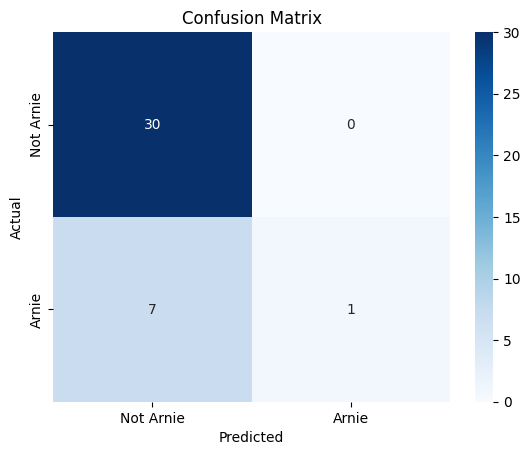

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Arnie', 'Arnie'], yticklabels=['Not Arnie', 'Arnie'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

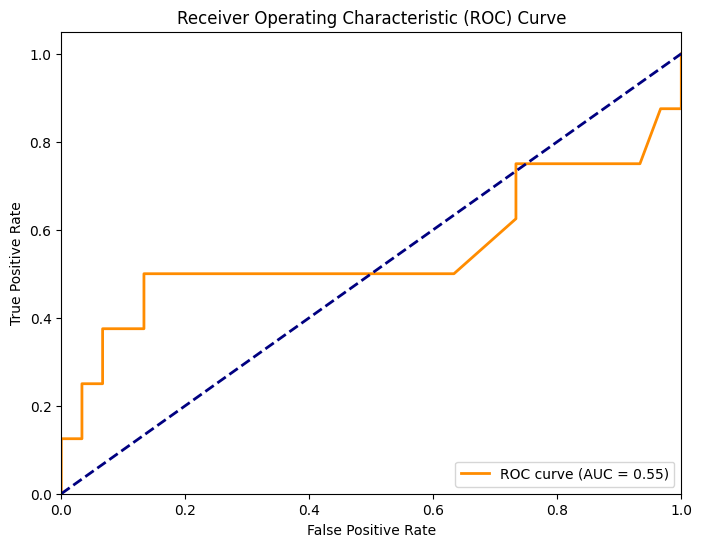

In [21]:
# Create ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine

In [22]:
pipeline =Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True))
    ])

In [23]:
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale', 'auto']
    }
}

In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
        pipeline,
        param_grids['SVM'],
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )
    


In [35]:
grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['rbf', 'linear']},
             scoring='f1')

In [36]:
 best_model = grid_search.best_estimator_

In [37]:
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]

In [38]:
print("\n Best Parametes:", grid_search.best_params_)


 Best Parametes: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [39]:
print(f"\nCross-validation F1 score: {grid_search.best_score_:.3f}")


Cross-validation F1 score: 0.976


In [40]:
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:",accuracy*100)


Accuracy: 78.94736842105263


In [41]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 0.000
Recall: 0.000
F1 Score: 0.000


D:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38



D:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


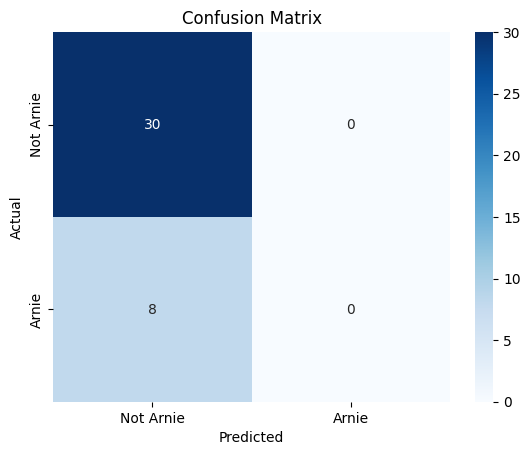

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Arnie', 'Arnie'], yticklabels=['Not Arnie', 'Arnie'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

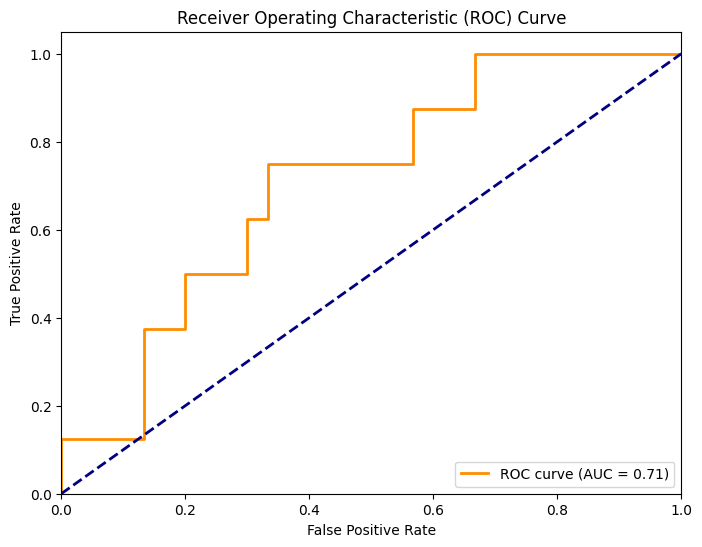

In [44]:
# Create ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()